In [1]:
import numpy as np
import pandas as pd
import open3d as o3d
import pymeshlab as pyml
import time 
import os
import trimesh


import matplotlib.pyplot as plt
import seaborn as sns


import pclpy
from pclpy import pcl
from plyfile import PlyData, PlyElement,PlyProperty, PlyListProperty
from sklearn.decomposition import PCA



In [2]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_colwidth", 256)

In [3]:
%matplotlib inline
sns.set(rc={'figure.figsize':(8,6)})


In [4]:
os.chdir("D:\\Workspace\\Python\\Thesis Data\\")

In [5]:
os.getcwd()

'D:\\Workspace\\Python\\Thesis Data'

In [6]:
INPUT_PATH = os.getcwd()+'\\Save data\\Processed_data'
OUTPUT_TEMP_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output_temp'

INPUT_TEMP_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output_temp'
OUTPUT_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output'
OUTPUT_PCA_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output\\PCA'

In [7]:
patient_id_list = '1_AK	60_BL	61_BN	62_CA	63_CA	64_CA	65_FU	66_GI	67_HC	68_HD	69_HI	70_HI	71_HRA	72_HRA	73_HS	74_HS	75_IS	76_JM	77_KA	78_KB	79_KBB	80_KBB	81_KBB	82_KBB	83_KBB	84_KE	85_KG	86_KI	87_KJ	88_KR	89_LE	90_BMW	91_LS	92_MAS	93_MAS	94_MAS	95_MAS	96_MAS	97_MD	98_MJ	99_MM	100_MR	101_MR	102_OC	103_PA	104_PH	105_RS	106_RU	107_SA	108_SB	109_SG	110_SK	111_SK	112_SM	113_SN	114_SR	115_SR	116_SR	117_TI	118_TI	119_TI	120_TM	121_TR	122_TR	123_TR	124_VA	125_VT	126_WD	127_WW	128_WW	129_ZK	130_ZK	131_ZK'
patient_id_list = patient_id_list.split()
patient_id_list[:5]

['1_AK', '60_BL', '61_BN', '62_CA', '63_CA']

In [8]:
patient_id_list_new =  '1_AK	60_BL	61_BN	62_CA	63_CA	64_CA	65_FU	66_GI	67_HC	68_HD	69_HI	70_HI	71_HRA	72_HRA	73_HS	74_HS	75_IS	76_JM	77_KA	78_KB	79_KBB	80_KBB	81_KBB	82_KBB	83_KBB	84_KE	85_KG	86_KI	87_KJ	88_KR	89_LE	90_BMW	91_LS	92_MAS	93_MAS	94_MAS	95_MAS	96_MAS	97_MD	98_MJ	99_MM	100_MR	101_MR	102_OC	103_PA	104_PH	105_RS	106_RU	107_SA	108_SB	109_SG	110_SK	111_SK	112_SM	113_SN	114_SR	115_SR	116_SR	117_TI	118_TI	119_TI	120_TM	121_TR	122_TR	123_TR	124_VA	125_VT	126_WD	127_WW	128_WW	129_ZK	130_ZK	131_ZK'
patient_id_list_new = patient_id_list_new.split()
patient_id_list_new[:5]

['1_AK', '60_BL', '61_BN', '62_CA', '63_CA']

In [9]:
ORIGINAL_FILENAME = "_PLY0.ply"
WSS_FILENAME = "_WSS.csv"
WSS_DOWN_FILENME = "_WSS_down.csv"
CURV_FILENAME = "_curv_down.csv"

PYMESH_FILENAME = "_pymesh.ply"
DESC_1_FILENAME = "_fpfh.ply"
DESC_2_FILENAME = "_shot.ply"

RADIUS_SEARCH = 0.00024
RADIUS = RADIUS_SEARCH * 0.6

OUTPUT_FILENAME = "_output.ply"
PCA_FILENAME = "_pca.ply"
os.path.join(OUTPUT_TEMP_PATH,f"{ORIGINAL_FILENAME}{PYMESH_FILENAME}")

'D:\\Workspace\\Python\\Thesis Data\\Save data\\Processed_data\\Output_temp\\_PLY0.ply_pymesh.ply'

In [10]:
print (f"TOTAL FILES TO BE PROCESSED: {len(patient_id_list)}")

TOTAL FILES TO BE PROCESSED: 73


## 1. Cleaning and Downsampling
##### Using Meshlab

In [11]:
counter = 1
for PATIENT_ID in patient_id_list:
    print(f"\nProcessing File at:")
    print(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    
    ms = pyml.MeshSet()

    TARGET_FACE_COUNT = 30000


    ms.load_new_mesh(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    ms.apply_filter('repair_non_manifold_edges_by_removing_faces')
    ms.apply_filter('simplification_quadric_edge_collapse_decimation',targetfacenum  = TARGET_FACE_COUNT, preserveboundary= True,
                   preservenormal = True, preservetopology = True)

    # ms.save_current_mesh(os.path.join(path,"bm_pymesh.ply"),format = 'ascii' )
    ms.save_current_mesh(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}_binary{PYMESH_FILENAME}") )
    
    
    
    #Convert BINARY to ASCII
    plydata = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}_binary{PYMESH_FILENAME}"), mmap=False)
    
    #Convert float64 to float32 as PCLPY features dont work on f8
    plydata.elements[0].properties = (PlyProperty('x', 'f4'), PlyProperty('y', 'f4'), PlyProperty('z', 'f4'))

    pl_wr = PlyData(plydata.elements, text = True, comments = ['PLYFILE BINARY TO ASCII CONVERTED'])
    pl_wr.write(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    os.remove(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}_binary{PYMESH_FILENAME}"))
    
    print(f"Finished processing {counter} files ")
    counter = counter + 1


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\1_AK_PLY0.ply
Finished processing 1 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\60_BL_PLY0.ply
Finished processing 2 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\61_BN_PLY0.ply
Finished processing 3 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\62_CA_PLY0.ply
Finished processing 4 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\63_CA_PLY0.ply
Finished processing 5 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\64_CA_PLY0.ply
Finished processing 6 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\65_FU_PLY0.ply
Finished processing 7 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\66_GI_PLY0.ply
Finished processing 8 files 

Processing File at:
D:\W

Finished processing 67 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\126_WD_PLY0.ply
Finished processing 68 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\127_WW_PLY0.ply
Finished processing 69 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\128_WW_PLY0.ply
Finished processing 70 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\129_ZK_PLY0.ply
Finished processing 71 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\130_ZK_PLY0.ply
Finished processing 72 files 

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\131_ZK_PLY0.ply
Finished processing 73 files 


## 2. Check Nearest Point Dist for different dataset files - For Radius Search

In [12]:
radius_columns = ['original_points','sampled_points','radius_mean','radius_median','radius_std','radius_min','radius_max',]
radius_df = pd.DataFrame(index=patient_id_list, columns = radius_columns )
radius_df.head(2)

,original_points,sampled_points,radius_mean,radius_median,radius_std,radius_min,radius_max
1_AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60_BL,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for PATIENT_ID in patient_id_list:

    #LOAD Point Cloud in o3d instance
    pc_original = o3d.io.read_point_cloud(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    pc_o3d = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

    #Compute nearest distance
    NN_dist = pc_o3d.compute_nearest_neighbor_distance()
    
    radius_df.loc[PATIENT_ID] = [len(np.asarray(pc_original.points)),len(np.asarray(pc_o3d.points)), 
                          np.mean(NN_dist), np.median(NN_dist), np.std(NN_dist), np.min(NN_dist), np.max(NN_dist)
                         ]

# df = df.astype(float)
radius_df = radius_df.infer_objects()
# pd.to_numeric(df, downcast='float')
radius_df.head(5)

,original_points,sampled_points,radius_mean,radius_median,radius_std,radius_min,radius_max
1_AK,77831,15256,0.000094,0.000093,0.000022,0.000018,0.000210
60_BL,55249,15288,0.000088,0.000087,0.000023,0.000020,0.000201
61_BN,65247,15144,0.000084,0.000083,0.000024,0.000019,0.000234
62_CA,51671,15321,0.000084,0.000083,0.000023,0.000023,0.000192
63_CA,40064,15247,0.000074,0.000074,0.000019,0.000026,0.000167


In [14]:
radius_df

,original_points,sampled_points,radius_mean,radius_median,radius_std,radius_min,radius_max
1_AK,77831,15256,0.000094,0.000093,0.000022,0.000018,0.000210
60_BL,55249,15288,0.000088,0.000087,0.000023,0.000020,0.000201
61_BN,65247,15144,0.000084,0.000083,0.000024,0.000019,0.000234
62_CA,51671,15321,0.000084,0.000083,0.000023,0.000023,0.000192
63_CA,40064,15247,0.000074,0.000074,0.000019,0.000026,0.000167
64_CA,59919,15244,0.000090,0.000089,0.000025,0.000020,0.000225
65_FU,31902,15167,0.000137,0.000135,0.000030,0.000032,0.000283
66_GI,137092,15595,0.000080,0.000080,0.000026,0.000014,0.000200
67_HC,54406,15336,0.000073,0.000072,0.000019,0.000014,0.000159
68_HD,74081,15421,0.000096,0.000096,0.000025,0.000008,0.000250


In [15]:
radius_df.describe(percentiles = np.arange(0,1.1,0.1))

,original_points,sampled_points,radius_mean,radius_median,radius_std,radius_min,radius_max
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,64021.602740,15312.013699,0.000093,0.000092,0.000025,0.000020,0.000230
std,23879.648092,101.548906,0.000024,0.000023,0.000007,0.000009,0.000060
min,22477.000000,15112.000000,0.000054,0.000053,0.000013,0.000002,0.000133
0%,22477.000000,15112.000000,0.000054,0.000053,0.000013,0.000002,0.000133
10%,42005.600000,15184.200000,0.000071,0.000070,0.000019,0.000009,0.000169
20%,46029.200000,15244.800000,0.000079,0.000078,0.000020,0.000013,0.000188
30%,50894.200000,15264.400000,0.000081,0.000080,0.000021,0.000015,0.000198
40%,55496.200000,15287.400000,0.000084,0.000083,0.000023,0.000018,0.000206
50%,59789.000000,15302.000000,0.000088,0.000087,0.000023,0.000020,0.000217


In [16]:
radius_df.describe().radius_max["50%"]

0.00021654441689177633

In [17]:
radius_df.iloc[[np.argmax(radius_df.radius_max)]].index.values[0]

'116_SR'

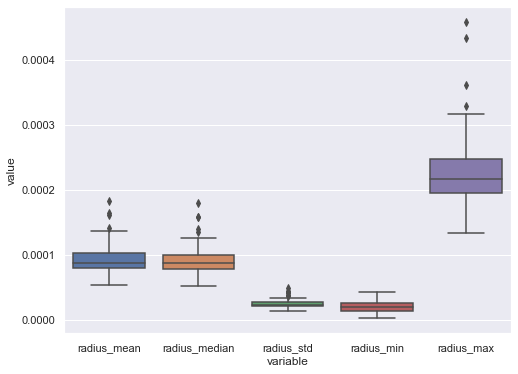

In [18]:
sns.boxplot(x="variable", y="value", data=pd.melt(radius_df.iloc[:,2:]))

plt.show()

## 3. WSS

In [19]:
wss_columns = ['original_points','sampled_points','wss_mean','wss_median','wss_std','wss_min','wss_max',]
wss_eda = pd.DataFrame(index=patient_id_list, columns = wss_columns )
wss_eda.head(2)

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
1_AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60_BL,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.1 Calculate WSS values across files (original)

In [20]:
for PATIENT_ID in patient_id_list:
    print(f"\nProcessing File at:")
    print(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    
    df_wss= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    
    wss_eda.loc[PATIENT_ID] = [df_wss.shape[0],np.nan, 
                          np.mean(df_wss.WSS), np.median(df_wss.WSS), np.std(df_wss.WSS), np.min(df_wss.WSS), np.max(df_wss.WSS)
                         ]
wss_eda = wss_eda.infer_objects()
wss_eda.head()


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\1_AK_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\60_BL_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\61_BN_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\62_CA_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\63_CA_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\64_CA_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\65_FU_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\66_GI_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\67_HC_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\68_HD_PLY0.ply

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processe

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
1_AK,77831,NaN,8.228137,5.052835,9.880563,1.611807e-02,93.424319
60_BL,55249,NaN,7.316287,5.195751,6.978238,2.884126e-03,49.471239
61_BN,65247,NaN,7.334927,1.574355,15.536789,6.315971e-08,150.751900
62_CA,51671,NaN,13.156344,10.118556,11.363920,1.244590e-02,91.678533
63_CA,40064,NaN,4.201272,3.273238,3.835202,2.559455e-02,34.047271


In [21]:
wss_eda

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
1_AK,77831,NaN,8.228137,5.052835,9.880563,1.611807e-02,93.424319
60_BL,55249,NaN,7.316287,5.195751,6.978238,2.884126e-03,49.471239
61_BN,65247,NaN,7.334927,1.574355,15.536789,6.315971e-08,150.751900
62_CA,51671,NaN,13.156344,10.118556,11.363920,1.244590e-02,91.678533
63_CA,40064,NaN,4.201272,3.273238,3.835202,2.559455e-02,34.047271
64_CA,59919,NaN,8.170181,6.357556,7.912286,8.049987e-03,40.453678
65_FU,31902,NaN,15.037442,12.429345,9.848919,5.203083e-02,62.358197
66_GI,137092,NaN,20.422613,20.374475,19.453964,1.876014e-02,300.913970
67_HC,54406,NaN,30.581044,31.030788,24.894663,1.707702e-01,187.124850
68_HD,74081,NaN,3.018138,1.960679,3.135520,1.990980e-03,34.810911


In [22]:
wss_eda.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,wss_mean,wss_median,wss_std,wss_min,wss_max
count,73.000000,0.0,73.000000,73.000000,73.000000,7.300000e+01,73.000000
mean,64021.602740,NaN,14.705260,10.815235,13.461906,3.516002e-02,124.540775
std,23879.648092,NaN,15.216825,9.231286,18.374968,5.291326e-02,211.223452
min,22477.000000,NaN,2.319769,0.670926,2.180552,4.726365e-08,16.354270
50%,59789.000000,NaN,11.946085,8.860579,9.905948,1.380815e-02,78.712178
55.6%,61595.000000,NaN,13.156344,9.767568,10.701039,1.570452e-02,91.678533
61.1%,64819.000000,NaN,14.877828,10.869044,11.354131,1.699635e-02,95.500891
66.7%,66391.000000,NaN,15.087367,12.170705,12.113969,2.024639e-02,117.788620
72.2%,74093.000000,NaN,16.468882,12.554828,12.941628,3.015500e-02,138.358610
77.8%,79433.000000,NaN,17.105994,14.386583,15.941658,3.805196e-02,156.419400


In [23]:
wss_eda.query("wss_max >= 400").index.values

array(['112_SM'], dtype=object)

In [30]:
wss_eda.query("wss_std >= 30").index.values

array(['112_SM', '122_TR'], dtype=object)

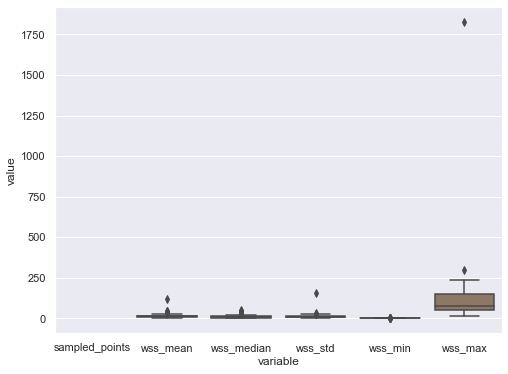

In [25]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_eda.iloc[:,1:]))

plt.show()

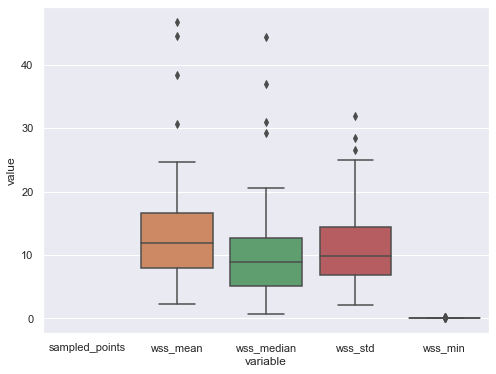

In [26]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_eda.query("wss_std <=100").iloc[:,1:-1]))

plt.show()

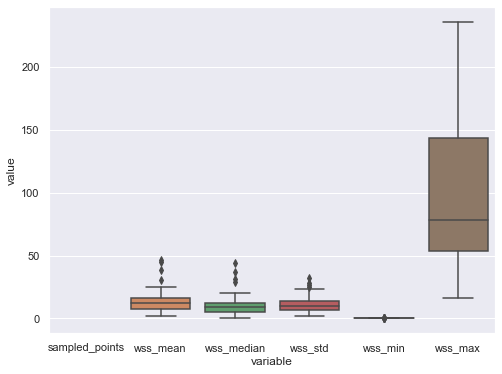

In [27]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_eda.query("wss_max <= 300").iloc[:,1:]))

plt.show()

### 3.2 Calculate WSS for downsampled point cloud

In [28]:
def get_total_runtime(start, end):
    temp = end-start
    print("Total seconds = %d" %temp)
    hours = temp//3600
    temp = temp - 3600*hours
    minutes = temp//60
    seconds = temp - 60*minutes
    print('Current file finished in %d hrs %d mins %d secs' %(hours,minutes,seconds))

In [149]:
# Get the Patient ID for the lowest max dist
P_ID = radius_df.iloc[[np.argmax(radius_df.radius_max)]].index.values[0]
print(f"Dataset PATIENT ID = {P_ID}")

Dataset PATIENT ID = 5_BM


In [157]:
#Read original file with WSS
df_wss= pd.read_csv(os.path.join(INPUT_PATH,f"{P_ID}{WSS_FILENAME}"))
df_wss.head(10)

,Points:0,Points:1,Points:2,WSS
0,0.013236,-0.001791,-0.030957,27.287485
1,0.013193,-0.001798,-0.031024,27.067192
2,0.013188,-0.001711,-0.031044,25.569170
3,0.013232,-0.001703,-0.030977,25.804458
4,0.017855,-0.005076,-0.031529,11.852991
5,0.017903,-0.005037,-0.031465,11.931856
6,0.017882,-0.005099,-0.031415,11.248607
7,0.017834,-0.005137,-0.031478,11.170350
8,0.016643,-0.006196,-0.030867,8.897130
9,0.016709,-0.006162,-0.030909,8.588890


#### REMOVE PATIENT_IDS WHICH ARE OUTLIERS


In [222]:
#REMOVE PATIENT_IDS WHICH ARE OUTLIERS
patient_id_list_new = [x for x in patient_id_list if x not in wss_eda.query("wss_std >= 40").index.values]

In [35]:
for PATIENT_ID in patient_id_list_new[:30]:
    print(f"\nProcessing File at:")
    print(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    
    start = time.time()

    #Read original file with WSS
    df_wss= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    #Round the points
    df_wss = np.around(df_wss,8).copy()
    
    #Create a df to save the files
    columns_wss_downsampled = ['x','y','z','WSS']
    df_wss_downsampled = pd.DataFrame(columns = columns_wss_downsampled )

    #Read Original and Downsampled point cloud
    pc_org = o3d.io.read_point_cloud(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    pc_down = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

    #Build tree for original point cloud
    kdtree_org = o3d.geometry.KDTreeFlann(pc_org)

    # Radius search 
#     RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
#     RADIUS_SEARCH = 0.00022

    for i in range(np.array(pc_down.points).shape[0]):
#     for i in range(10):

        search_pt = np.around(np.array(pc_down.points)[i], decimals = 8) 
        [k_org, idx_org, _] = kdtree_org.search_radius_vector_3d(search_pt, RADIUS_SEARCH)

        #Get Neighbourhood points and round them for avoiding issue with merge
        neighbour_pts = np.around(np.array(pc_org.points)[idx_org],decimals = 8)
        # Convert into a df - for merging
        neighbour_df = pd.DataFrame(neighbour_pts, columns = df_wss.columns.values[:3] )

        #Get the WSS column for the neighbourhood points 
        neighbour_df = neighbour_df.merge(df_wss, on = ['Points:0', 'Points:1', 'Points:2'], how='inner' )

        tempDF = pd.DataFrame(data = np.array([[search_pt[0],search_pt[1],search_pt[2],np.median(neighbour_df.WSS)]]),
                              columns = columns_wss_downsampled )
        df_wss_downsampled = pd.concat([df_wss_downsampled,tempDF],ignore_index=True)

    end = time.time()

    get_total_runtime(start,end) 
    
    #Round up the file to clean it.
    df_wss_downsampled = np.around(df_wss_downsampled,8)
    #Save the csv file
    df_wss_downsampled.to_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\1_AK_PLY0.ply
Total seconds = 5811
Current file finished in 1 hrs 36 mins 51 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\60_BL_PLY0.ply
Total seconds = 1599
Current file finished in 0 hrs 26 mins 39 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\61_BN_PLY0.ply
Total seconds = 1739
Current file finished in 0 hrs 28 mins 59 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\62_CA_PLY0.ply
Total seconds = 1129
Current file finished in 0 hrs 18 mins 49 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\63_CA_PLY0.ply
Total seconds = 762
Current file finished in 0 hrs 12 mins 42 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\64_CA_PLY0.ply
Total seconds = 1628
Current file finished in 0 hrs 27 mins 8 secs

Processing File at:
D:\Workspace\Pyt

In [ ]:
for PATIENT_ID in patient_id_list_new[30:65]:
    print(f"\nProcessing File at:")
    print(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    
    start = time.time()

    #Read original file with WSS
    df_wss= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    #Round the points
    df_wss = np.around(df_wss,8).copy()
    
    #Create a df to save the files
    columns_wss_downsampled = ['x','y','z','WSS']
    df_wss_downsampled = pd.DataFrame(columns = columns_wss_downsampled )

    #Read Original and Downsampled point cloud
    pc_org = o3d.io.read_point_cloud(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    pc_down = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

    #Build tree for original point cloud
    kdtree_org = o3d.geometry.KDTreeFlann(pc_org)

    # Radius search 
#     RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
#     RADIUS_SEARCH = 0.00022

    for i in range(np.array(pc_down.points).shape[0]):
#     for i in range(10):

        search_pt = np.around(np.array(pc_down.points)[i], decimals = 8) 
        [k_org, idx_org, _] = kdtree_org.search_radius_vector_3d(search_pt, RADIUS_SEARCH)

        #Get Neighbourhood points and round them for avoiding issue with merge
        neighbour_pts = np.around(np.array(pc_org.points)[idx_org],decimals = 8)
        # Convert into a df - for merging
        neighbour_df = pd.DataFrame(neighbour_pts, columns = df_wss.columns.values[:3] )

        #Get the WSS column for the neighbourhood points 
        neighbour_df = neighbour_df.merge(df_wss, on = ['Points:0', 'Points:1', 'Points:2'], how='inner' )

        tempDF = pd.DataFrame(data = np.array([[search_pt[0],search_pt[1],search_pt[2],np.median(neighbour_df.WSS)]]),
                              columns = columns_wss_downsampled )
        df_wss_downsampled = pd.concat([df_wss_downsampled,tempDF],ignore_index=True)

    end = time.time()

    get_total_runtime(start,end) 
    
    #Round up the file to clean it.
    df_wss_downsampled = np.around(df_wss_downsampled,8)
    #Save the csv file
    df_wss_downsampled.to_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))

In [228]:
df_wss_downsampled.head(10)

,x,y,z,WSS
0,-0.016053,-0.170312,-0.136053,7.763216
1,-0.016126,-0.170261,-0.136058,7.786854
2,-0.016134,-0.170312,-0.135983,7.786854
3,-0.016069,-0.170165,-0.136438,7.756574
4,-0.015988,-0.170190,-0.136440,7.493181
5,-0.016028,-0.170172,-0.136526,7.755634
6,-0.017048,-0.163184,-0.148487,7.762622
7,-0.014137,-0.171077,-0.138721,4.687528
8,-0.014219,-0.171063,-0.138676,4.914766
9,-0.014440,-0.171526,-0.139745,4.824997


In [36]:
for PATIENT_ID in patient_id_list_new[65:]:
    print(f"\nProcessing File at:")
    print(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    
    start = time.time()

    #Read original file with WSS
    df_wss= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    #Round the points
    df_wss = np.around(df_wss,8).copy()
    
    #Create a df to save the files
    columns_wss_downsampled = ['x','y','z','WSS']
    df_wss_downsampled = pd.DataFrame(columns = columns_wss_downsampled )

    #Read Original and Downsampled point cloud
    pc_org = o3d.io.read_point_cloud(os.path.join(INPUT_PATH,f"{PATIENT_ID}{ORIGINAL_FILENAME}"))
    pc_down = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

    #Build tree for original point cloud
    kdtree_org = o3d.geometry.KDTreeFlann(pc_org)

    # Radius search 
#     RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
#     RADIUS_SEARCH = 0.00022

    for i in range(np.array(pc_down.points).shape[0]):
#     for i in range(10):

        search_pt = np.around(np.array(pc_down.points)[i], decimals = 8) 
        [k_org, idx_org, _] = kdtree_org.search_radius_vector_3d(search_pt, RADIUS_SEARCH)

        #Get Neighbourhood points and round them for avoiding issue with merge
        neighbour_pts = np.around(np.array(pc_org.points)[idx_org],decimals = 8)
        # Convert into a df - for merging
        neighbour_df = pd.DataFrame(neighbour_pts, columns = df_wss.columns.values[:3] )

        #Get the WSS column for the neighbourhood points 
        neighbour_df = neighbour_df.merge(df_wss, on = ['Points:0', 'Points:1', 'Points:2'], how='inner' )

        tempDF = pd.DataFrame(data = np.array([[search_pt[0],search_pt[1],search_pt[2],np.median(neighbour_df.WSS)]]),
                              columns = columns_wss_downsampled )
        df_wss_downsampled = pd.concat([df_wss_downsampled,tempDF],ignore_index=True)

    end = time.time()

    get_total_runtime(start,end) 
    
    #Round up the file to clean it.
    df_wss_downsampled = np.around(df_wss_downsampled,8)
    #Save the csv file
    df_wss_downsampled.to_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\124_VA_PLY0.ply
Total seconds = 1074
Current file finished in 0 hrs 17 mins 54 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\125_VT_PLY0.ply
Total seconds = 1620
Current file finished in 0 hrs 27 mins 0 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\126_WD_PLY0.ply
Total seconds = 975
Current file finished in 0 hrs 16 mins 15 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\127_WW_PLY0.ply
Total seconds = 3766
Current file finished in 1 hrs 2 mins 46 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\128_WW_PLY0.ply
Total seconds = 618
Current file finished in 0 hrs 10 mins 18 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\129_ZK_PLY0.ply
Total seconds = 2133
Current file finished in 0 hrs 35 mins 33 secs

Processing File at:
D:\Workspac

## 4. Calculate Curvature Values

In [44]:
def get_total_runtime(start, end):
    temp = end-start
    print("Total seconds = %d" %temp)
    hours = temp//3600
    temp = temp - 3600*hours
    minutes = temp//60
    seconds = temp - 60*minutes
    print('Current file finished in %d hrs %d mins %d secs' %(hours,minutes,seconds))

In [45]:
#Set Radius
RADIUS_SEARCH = 0.00024

    
for PATIENT_ID in patient_id_list_new:
    
    start = time.time()
    print(f"\nProcessing File at:")
    print(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    #Load Mesh with Trimesh
    #NOTE: The order of the points change compared to the original file
    #In order to concatenate files correctly, original point order needs to be loaded 
    #and the curvature values should be added to that
    tr_mesh = trimesh.load(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))

    #Load downsampled mesh with original point order
    pc_down = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    #Make a df with correct order of points - to be used for concatenation of all the features
    curv_df = pd.DataFrame(np.array(pc_down.points), columns = ['x','y','z'] )
    curv_df = np.around(curv_df, decimals = 8)

    #Make df to store the calculated curvature values from trimesh against the vertex
    tri_curv_df = pd.DataFrame(tr_mesh.vertices, columns = ['x','y','z'] )
    
   
    #Compute Curvatures
    mean_curv = trimesh.curvature.discrete_mean_curvature_measure(mesh = tr_mesh, points = tr_mesh.vertices, 
                                                                  radius =  RADIUS_SEARCH)
    gauss_curv = trimesh.curvature.discrete_gaussian_curvature_measure(mesh = tr_mesh, points = tr_mesh.vertices, 
                                                                  radius =  RADIUS_SEARCH)
    
    #Assign curvature values for 
    tri_curv_df["mean_curv"] = mean_curv
    tri_curv_df ["gauss_curv"] = gauss_curv

    #Round it for better merging
    tri_curv_df = np.around(tri_curv_df,decimals = 8)
    
    #Merge the curv values with ordered pointset
    curv_df = curv_df.merge(tri_curv_df, on = ['x','y','z'])
    
    #Save the file with mean and gauss curv vales
    curv_df.to_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{CURV_FILENAME}"), index = False )
    
    end = time.time()

    get_total_runtime(start,end) 


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\1_AK_pymesh.ply
Total seconds = 11
Current file finished in 0 hrs 0 mins 11 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\60_BL_pymesh.ply
Total seconds = 11
Current file finished in 0 hrs 0 mins 11 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\61_BN_pymesh.ply
Total seconds = 12
Current file finished in 0 hrs 0 mins 12 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\62_CA_pymesh.ply
Total seconds = 12
Current file finished in 0 hrs 0 mins 12 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\63_CA_pymesh.ply
Total seconds = 12
Current file finished in 0 hrs 0 mins 12 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\64_CA_pymesh.ply
Total seconds = 11
Current file fi

Total seconds = 12
Current file finished in 0 hrs 0 mins 12 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\107_SA_pymesh.ply
Total seconds = 11
Current file finished in 0 hrs 0 mins 11 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\108_SB_pymesh.ply
Total seconds = 12
Current file finished in 0 hrs 0 mins 12 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\109_SG_pymesh.ply
Total seconds = 13
Current file finished in 0 hrs 0 mins 13 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\110_SK_pymesh.ply
Total seconds = 12
Current file finished in 0 hrs 0 mins 12 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\111_SK_pymesh.ply
Total seconds = 13
Current file finished in 0 hrs 0 mins 13 secs

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Process

## 5. Calculate Local descriptors + Concatenate at the same time

In [46]:
def get_total_runtime(start, end):
    temp = end-start
    print("Total seconds = %d" %temp)
    hours = temp//3600
    temp = temp - 3600*hours
    minutes = temp//60
    seconds = temp - 60*minutes
#     print('Current file finished in %d hrs %d mins %d secs' %(hours,minutes,seconds))
    return hours,minutes,seconds

In [265]:
# RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
# RADIUS = RADIUS_SEARCH * 0.6

for PATIENT_ID in patient_id_list_new:
    fullstart = time.time()
    print(f"\nProcessing File at:")
    print(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    ############-------------------#############
    ############ Local Descriptors #############
    ############-------------------#############
    
    start = time.time()
    print("--------------> Starting Local descriptor computation")
    
    pcl_pc_obj = pclpy.pcl.PointCloud.PointXYZ()

    #Store in pcl_pc_obj
    pc = pcl.io.loadPLYFile(file_name = os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"), cloud = pcl_pc_obj )


    data_normals = pcl_pc_obj.compute_normals(radius=RADIUS, num_threads=8)

    fpfh = pcl.features.FPFHEstimation.PointXYZ_Normal_FPFHSignature33()
    fpfh.setInputCloud(cloud = pcl_pc_obj)
    fpfh.setInputNormals(data_normals)
    fpfh.setRadiusSearch(RADIUS_SEARCH)


    fpfh_desc = pcl.PointCloud.FPFHSignature33()
    fpfh.compute(fpfh_desc)

    shot = pcl.features.SHOTEstimation.PointXYZ_Normal_SHOT352_ReferenceFrame()
    shot.setInputCloud(cloud = pcl_pc_obj)
    shot.setInputNormals(data_normals)
    shot.setRadiusSearch(RADIUS_SEARCH)

    shot_desc = pcl.PointCloud.SHOT352()
    shot.compute(shot_desc)

   
    #Save files
    pcl.io.savePLYFileASCII(file_name = os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{DESC_1_FILENAME}"), cloud = fpfh_desc)
    pcl.io.savePLYFileASCII(file_name = os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{DESC_2_FILENAME}"), cloud = shot_desc)
    
    end = time.time()
    
    #Compute total time
    hours,minutes,seconds = get_total_runtime(start,end)
    print(f"Finished computing and saving Local descriptors in {hours} hrs {minutes} mins {round(seconds)} secs")

    
    
    ############-------------------#############
    ############ Concatenate Files #############
    ############-------------------#############
    #https://github.com/dranjan/python-plyfile/issues/26 
    
    start = time.time()
    print("--------------> Starting File Concatenation")

    #Load the original downsampled mesh
    meshply = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    #Load curvature dataframe
    curv_df = pd.read_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{CURV_FILENAME}"))
    
    #Load WSS dataframe - downsampled
    wss_df = pd.read_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))
    
    #Divide the elements in different variables for concat
    v = meshply.elements[0]
    f = meshply.elements[1]

    # Create the new vertex data with a new name with required dtype
    a = np.empty(len(v.data), v.data.dtype.descr 
                 +[('WSS','f4')]
                 +[('mean_curv','f4')] 
                 + [('gauss_curv','f4')] 
                 + [('fpfh', '|O')] 
                 + [('shot', '|O')] + [('rf', '|O')]
                )

    for name in v.data.dtype.fields:
        #re-assign
        a[name] = v[name]
    # a['label'] = [np.array([1,2,19]),np.array([1,2,1]),np.array([11,22,19]),np.array([15,12,1])]
    a['WSS'] = wss_df['WSS'].values
    a['mean_curv'] = curv_df['mean_curv'].values
    a['gauss_curv'] = curv_df['gauss_curv'].values
    
    #Should be list of list for saving using PlyListProperty
    a['fpfh'] = fpfh_desc.histogram.tolist()
    a['shot'] = shot_desc.descriptor.tolist()
    a['rf'] = shot_desc.rf.tolist()

    # Recreate the PlyElement instance
    vert = PlyElement.describe(a, 'vertex')
    
    # Redefine properties - to save correct file format
    vert.properties = v.properties + (PlyProperty('WSS', 'f4'),
                                      PlyProperty('mean_curv', 'f4'),
                                      PlyProperty('gauss_curv', 'f4'),
                                      PlyListProperty('fpfh', 'uint', 'float'),
                                      PlyListProperty('shot', 'uint', 'float'), 
                                      PlyListProperty('rf', 'uint', 'float'),
                                     )
    # Recreate the PlyData instance with added features
    meshply = PlyData([vert, f], text=True)
    
    #Save the Mesh file 
    meshply.write((os.path.join(OUTPUT_PATH,f"{PATIENT_ID}{OUTPUT_FILENAME}")))
    
    end = time.time()
    
    #Compute total time
    hours,minutes,seconds = get_total_runtime(start,end)
    print(f"Finished concatenating files in {hours} hrs {minutes} mins {round(seconds)} secs")
    
    
    fullend = time.time()
    hours,minutes,seconds = get_total_runtime(fullstart,fullend)
    print(f"Total time taken for PATIENT_ID {PATIENT_ID}: {hours} hrs {minutes} mins {round(seconds)} secs")
    print(f"\n {'-'*100}")


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\2_BC_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 9
Finished concatenating files in 0.0 hrs 0.0 mins 9 secs
Total seconds = 15
Total time taken for PATIENT_ID 2_BC: 0.0 hrs 0.0 mins 15 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\3_BC_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 8 secs
Total seconds = 14
Total time taken for PATIENT_ID 3_BC: 0.0 hrs 0.0 mins 14 secs

--------------

Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 9 secs
Total seconds = 14
Total time taken for PATIENT_ID 18_EM: 0.0 hrs 0.0 mins 14 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\19_EM_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 9 secs
Total seconds = 14
Total time taken for PATIENT_ID 19_EM: 0.0 hrs 0.0 mins 15 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\20_EM_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 5
Finished computing and saving Local descriptors in 

Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 8 secs
Total seconds = 14
Total time taken for PATIENT_ID 34_KBB: 0.0 hrs 0.0 mins 15 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\35_KBB_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 5
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 8 secs
Total seconds = 14
Total time taken for PATIENT_ID 35_KBB: 0.0 hrs 0.0 mins 14 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\

Total seconds = 5
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 9 secs
Total seconds = 14
Total time taken for PATIENT_ID 51_LE: 0.0 hrs 0.0 mins 14 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\52_LE_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 5
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 8
Finished concatenating files in 0.0 hrs 0.0 mins 9 secs
Total seconds = 14
Total time taken for PATIENT_ID 52_LE: 0.0 hrs 0.0 mins 15 secs

-----------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\54_

In [38]:

def compute_PCA_transform(fpfh_desc, shot_desc_main, shot_desc_rf,
                          fpfh_N_COMPONENTS, shot_N_components):
    
    fp    = np.nan_to_num(fpfh_desc)
    sh_main = np.nan_to_num(shot_desc_main)
    sh_rf = np.nan_to_num(shot_desc_rf)
    
    #Instantiate PCA for FPFH
    pca = PCA(n_components= fpfh_N_COMPONENTS)
    pca.fit(fp)
    fpfh = pca.transform(fp)
    
    #Instantiate PCA for SHOT
    pca = PCA(n_components= shot_N_components)
    pca.fit(sh_main)
    shot_main = pca.transform(sh_main)
    
    pca.fit(sh_rf)
    shot_rf = pca.transform(sh_rf)
    
    return fpfh, shot_main, shot_rf

In [39]:
def get_concatenated_properties(vertex, face, wss_df,curv_df,fpfh_desc,shot_desc_main,shot_desc_rf):
    
    # Create the new vertex data with a new name with required dtype
    a = np.empty(len(v.data), v.data.dtype.descr 
                 +[('WSS','f4')]
                 +[('mean_curv','f4')] 
                 + [('gauss_curv','f4')] 
                 + [('fpfh', '|O')] 
                 + [('shot', '|O')] + [('rf', '|O')]
                )

    for name in v.data.dtype.fields:
        #re-assign
        a[name] = v[name]
    # a['label'] = [np.array([1,2,19]),np.array([1,2,1]),np.array([11,22,19]),np.array([15,12,1])]
    a['WSS'] = wss_df['WSS'].values
    a['mean_curv'] = curv_df['mean_curv'].values
    a['gauss_curv'] = curv_df['gauss_curv'].values
    
    #Should be list of list for saving using PlyListProperty
    a['fpfh'] = fpfh_desc.tolist()
    a['shot'] = shot_desc_main.tolist()
    a['rf'] = shot_desc_rf.tolist()

    # Recreate the PlyElement instance
    vert = PlyElement.describe(a, 'vertex')
    
    # Redefine properties - to save correct file format
    vert.properties = v.properties + (PlyProperty('WSS', 'f4'),
                                      PlyProperty('mean_curv', 'f4'),
                                      PlyProperty('gauss_curv', 'f4'),
                                      PlyListProperty('fpfh', 'uint', 'float'),
                                      PlyListProperty('shot', 'uint', 'float'), 
                                      PlyListProperty('rf', 'uint', 'float'),
                                     )
    
    return vert, face

In [47]:
# RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)
RADIUS_SEARCH = 0.00024
RADIUS = RADIUS_SEARCH * 0.6
FPFH_N_COMPONENTS = 2
SHOT_N_COMPONENTS = 3

for PATIENT_ID in patient_id_list_new:
    fullstart = time.time()
    print(f"\nProcessing File at:")
    print(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    ############-------------------#############
    ############ Local Descriptors #############
    ############-------------------#############
    
    start = time.time()
    print("--------------> Starting Local descriptor computation")
    
    pcl_pc_obj = pclpy.pcl.PointCloud.PointXYZ()

    #Store in pcl_pc_obj
    pc = pcl.io.loadPLYFile(file_name = os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"), cloud = pcl_pc_obj )


    data_normals = pcl_pc_obj.compute_normals(radius=RADIUS, num_threads=8)

    fpfh = pcl.features.FPFHEstimation.PointXYZ_Normal_FPFHSignature33()
    fpfh.setInputCloud(cloud = pcl_pc_obj)
    fpfh.setInputNormals(data_normals)
    fpfh.setRadiusSearch(RADIUS_SEARCH)


    fpfh_desc = pcl.PointCloud.FPFHSignature33()
    fpfh.compute(fpfh_desc)

    shot = pcl.features.SHOTEstimation.PointXYZ_Normal_SHOT352_ReferenceFrame()
    shot.setInputCloud(cloud = pcl_pc_obj)
    shot.setInputNormals(data_normals)
    shot.setRadiusSearch(RADIUS_SEARCH)

    shot_desc = pcl.PointCloud.SHOT352()
    shot.compute(shot_desc)

   
    #Save files
    pcl.io.savePLYFileASCII(file_name = os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{DESC_1_FILENAME}"), cloud = fpfh_desc)
    pcl.io.savePLYFileASCII(file_name = os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{DESC_2_FILENAME}"), cloud = shot_desc)
    
    end = time.time()
    
    #Compute total time
    hours,minutes,seconds = get_total_runtime(start,end)
    print(f"Finished computing and saving Local descriptors in {hours} hrs {minutes} mins {round(seconds)} secs")

    
    
    ############-------------------#############
    ############ Concatenate Files #############
    ############-------------------#############
    #https://github.com/dranjan/python-plyfile/issues/26 
    
    start = time.time()
    print("--------------> Starting File Concatenation")

    #Load the original downsampled mesh
    meshply = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{PYMESH_FILENAME}"))
    
    #Load curvature dataframe
    curv_df = pd.read_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{CURV_FILENAME}"))
    
    #Load WSS dataframe - downsampled
    wss_df = pd.read_csv(os.path.join(OUTPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))
    
    #Divide the elements in different variables for concat
    v = meshply.elements[0]
    f = meshply.elements[1]
    
    vert, f = get_concatenated_properties(v,f,
                                          wss_df,
                                          curv_df,
                                          fpfh_desc.histogram,
                                          shot_desc.descriptor,
                                          shot_desc.rf)
    
    # Recreate the PlyData instance with added features
    meshply = PlyData([vert, f], text=True)
    
    #Save the Mesh file 
    meshply.write((os.path.join(OUTPUT_PATH,f"{PATIENT_ID}{OUTPUT_FILENAME}")))
    
    
    fpfh_desc_pca, shot_desc_main_pca, shot_desc_rf_pca = compute_PCA_transform(fpfh_desc.histogram,
                                                                                shot_desc.descriptor,
                                                                                shot_desc.rf,
                                                                                FPFH_N_COMPONENTS,
                                                                               SHOT_N_COMPONENTS)
    
    vert, f = get_concatenated_properties(v,f,
                                          wss_df,
                                          curv_df,
                                          fpfh_desc_pca,
                                          shot_desc_main_pca,
                                          shot_desc_rf_pca)
    
     # Recreate the PlyData instance with added features
    meshply = PlyData([vert, f], text=True)
    
    #Save the Mesh file 
    meshply.write((os.path.join(OUTPUT_PCA_PATH,f"{PATIENT_ID}{PCA_FILENAME}")))
    
    end = time.time()
    
    #Compute total time
    hours,minutes,seconds = get_total_runtime(start,end)
    print(f"Finished concatenating files in {hours} hrs {minutes} mins {round(seconds)} secs")
    
    
    fullend = time.time()
    hours,minutes,seconds = get_total_runtime(fullstart,fullend)
    print(f"Total time taken for PATIENT_ID {PATIENT_ID}: {hours} hrs {minutes} mins {round(seconds)} secs")
    print(f"\n {'-'*100}")


Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\1_AK_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 7 secs
--------------> Starting File Concatenation
Total seconds = 12
Finished concatenating files in 0.0 hrs 0.0 mins 13 secs
Total seconds = 19
Total time taken for PATIENT_ID 1_AK: 0.0 hrs 0.0 mins 19 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\60_BL_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 12
Finished concatenating files in 0.0 hrs 0.0 mins 13 secs
Total seconds = 19
Total time taken for PATIENT_ID 60_BL: 0.0 hrs 0.

Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 12
Finished concatenating files in 0.0 hrs 0.0 mins 13 secs
Total seconds = 19
Total time taken for PATIENT_ID 74_HS: 0.0 hrs 0.0 mins 19 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\75_IS_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 13
Finished concatenating files in 0.0 hrs 0.0 mins 13 secs
Total seconds = 19
Total time taken for PATIENT_ID 75_IS: 0.0 hrs 0.0 mins 20 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\

Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 6 secs
--------------> Starting File Concatenation
Total seconds = 12
Finished concatenating files in 0.0 hrs 0.0 mins 13 secs
Total seconds = 19
Total time taken for PATIENT_ID 89_LE: 0.0 hrs 0.0 mins 19 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\90_BMW_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 6
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 7 secs
--------------> Starting File Concatenation
Total seconds = 12
Finished concatenating files in 0.0 hrs 0.0 mins 12 secs
Total seconds = 19
Total time taken for PATIENT_ID 90_BMW: 0.0 hrs 0.0 mins 19 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Pytho

Total seconds = 8
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 9 secs
--------------> Starting File Concatenation
Total seconds = 16
Finished concatenating files in 0.0 hrs 0.0 mins 17 secs
Total seconds = 25
Total time taken for PATIENT_ID 104_PH: 0.0 hrs 0.0 mins 26 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\105_RS_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 8
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 8 secs
--------------> Starting File Concatenation
Total seconds = 16
Finished concatenating files in 0.0 hrs 0.0 mins 17 secs
Total seconds = 25
Total time taken for PATIENT_ID 105_RS: 0.0 hrs 0.0 mins 25 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Pyth

Total seconds = 8
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 9 secs
--------------> Starting File Concatenation
Total seconds = 16
Finished concatenating files in 0.0 hrs 0.0 mins 17 secs
Total seconds = 25
Total time taken for PATIENT_ID 119_TI: 0.0 hrs 0.0 mins 25 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Python\Thesis Data\Save data\Processed_data\Output_temp\120_TM_pymesh.ply
--------------> Starting Local descriptor computation
Total seconds = 8
Finished computing and saving Local descriptors in 0.0 hrs 0.0 mins 9 secs
--------------> Starting File Concatenation
Total seconds = 17
Finished concatenating files in 0.0 hrs 0.0 mins 17 secs
Total seconds = 25
Total time taken for PATIENT_ID 120_TM: 0.0 hrs 0.0 mins 26 secs

 ----------------------------------------------------------------------------------------------------

Processing File at:
D:\Workspace\Pyth

In [150]:
#Read Downsampled point cloud
pc_o3d = o3d.io.read_point_cloud(os.path.join(OUTPUT_TEMP_PATH,f"{P_ID}{PYMESH_FILENAME}"))

#Build tree for original point cloud
o3d_kdtree = o3d.geometry.KDTreeFlann(pc_o3d)

# Radius search 
RADIUS_SEARCH = np.around(radius_df.describe().radius_max["50%"],decimals = 5)

search_pt_min = pc_o3d.points[np.argmin(np.array(NN_dist))]
search_pt_max = pc_o3d.points[np.argmax(np.array(NN_dist))]

[k_min, idx_min, _] = o3d_kdtree.search_radius_vector_3d(search_pt_min, RADIUS_SEARCH)
[k_max, idx_max, _] = o3d_kdtree.search_radius_vector_3d(search_pt_max, RADIUS_SEARCH)

print(f"\nTotal neighbourhood points for the point with: \nmin dist = {k_min} \nmax dist = {k_max}")


Total neighbourhood points for the point with: 
min dist = 8 
max dist = 4


In [197]:
np.array(pc_o3d.points)[idx_max]

array([[ 0.02120341, -0.00085545, -0.02338964],
       [ 0.02135746, -0.00092897, -0.02336138],
       [ 0.02107149, -0.00089891, -0.02350854],
       [ 0.02124992, -0.00101906, -0.02346549]])

In [182]:
p = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,"tet.ply"))
v = p.elements[0]
f = p.elements[1]

# Create the new vertex data with a new name with required dtype
a = np.empty(len(v.data), v.data.dtype.descr + [('label', 'i4')])
for name in v.data.dtype.fields:
    #re-assign
    a[name] = v[name]
a['label'] = 123
a['label'][0] = 123
a['label'][1] = 126
a['label'][2] = 129
a['label'][3] = 121

# Recreate the PlyElement instance
v = PlyElement.describe(a, 'vertex')

# Recreate the PlyData instance
p = PlyData([v, f], text=True)

p.write((os.path.join(OUTPUT_TEMP_PATH,"test.ply")))

In [176]:
v.data.dtype.fields

mappingproxy({'x': (dtype('float32'), 0),
              'y': (dtype('float32'), 4),
              'z': (dtype('float32'), 8),
              'label': (dtype('int32'), 12)})

In [194]:
p = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,"tet.ply"))
v = p.elements[0]
f = p.elements[1]

# Create the new vertex data with a new name with required dtype
a = np.empty(len(v.data), v.data.dtype.descr + [('label', '|O')])
for name in v.data.dtype.fields:
    #re-assign
    a[name] = v[name]
a['label'] = [np.array([1,2,19]),np.array([1,2,1]),np.array([11,22,19]),np.array([15,12,1])]
# a['label'][0] = 123
# a['label'][1] = 126
# a['label'][2] = 129
# a['label'][3] = 121

# Recreate the PlyElement instance
v = PlyElement.describe(a, 'vertex')

# Recreate the PlyData instance
p = PlyData([v, f], text=True)

p.write((os.path.join(OUTPUT_TEMP_PATH,"test.ply")))

In [192]:
np.array([1,2,19])

array([ 1,  2, 19])

In [181]:
a

array([(0., 0., 0., 123), (0., 1., 1., 126), (1., 0., 1., 129),
       (1., 1., 0., 121)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('label', '<i4')])

In [168]:
v.data.dtype.descr + [('label', 'i4')]

[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('label', 'i4')]

In [188]:
p = PlyData.read(os.path.join(OUTPUT_TEMP_PATH,"test_fpfh.ply"))
v = p.elements[0]

In [189]:
p.elements[0].data.dtype.descr

[('fpfh', '|O')]

In [183]:
a['label']

array([123, 126, 129, 121])

In [190]:
p.elements[0].data

array([(array([84.14448  ,  0.       ,  0.       ,  0.       ,  2.3670673,
       13.488455 ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       , 84.14448  ,  0.       ,  0.       ,  2.3670673,
        8.992304 ,  0.       ,  0.       ,  2.1290843,  2.3670673,
        0.       ,  0.       , 68.52694  ,  0.       ,  0.       ,
        0.       ,  2.3670673, 13.488455 ,  8.516337 ,  7.1012025,
        0.       ,  0.       ,  0.       ], dtype=float32),),
       (array([100.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       , 100.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,  86.40641  ,   0.       ,   0.       ,
         0.       ,   3.3983986,   6.7967973,   3.3983986,   0.       ,
         0.       ,   0.       ,   0.       ], dtype=float32),),
       (array([100.,   